In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
df = pd.read_csv("C:\\data science class\\assignments\\Neural networks\\Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [24]:
X= df.drop(columns=['letter'],axis=1)
Y= df['letter']

#data transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

le = LabelEncoder()
Y_LE = le.fit_transform(Y)
Y_LE

array([19,  8,  3, ..., 19, 18,  0])

In [25]:
#split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_LE, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16000, 16), (4000, 16), (16000,), (4000,))

In [53]:
# Define the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), #There are 16 X variables  so using 16 input neurons
    tf.keras.layers.Dense(26, activation='relu'), #there are 26 alphabets so using 26 output
    tf.keras.layers.Dense(len(le.classes_), 
                          activation='softmax') # to increse the accuracy using activation  softmax because not using this giving 0.22 accuracy
])

#Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1733 - loss: 2.8741
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5680 - loss: 1.4675
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6775 - loss: 1.0761
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 0.9532
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7409 - loss: 0.8539
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7599 - loss: 0.8063
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7764 - loss: 0.7504
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.7276
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.6787
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7940 - loss: 0.6677
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.6461
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [59]:
accuracy = np.round(model.history.history['accuracy'],4)
print(len(accuracy))

Loss = np.round(model.history.history['loss'],4)
len(Loss)

50


50

In [56]:
# Evaluate the model on the test set
from sklearn.metrics import precision_score, f1_score, recall_score
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {np.round(loss,4)}")
print(f"Test Accuracy: {np.round(accuracy,4)}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3898
Test Loss: 0.3979
Test Accuracy: 0.8767


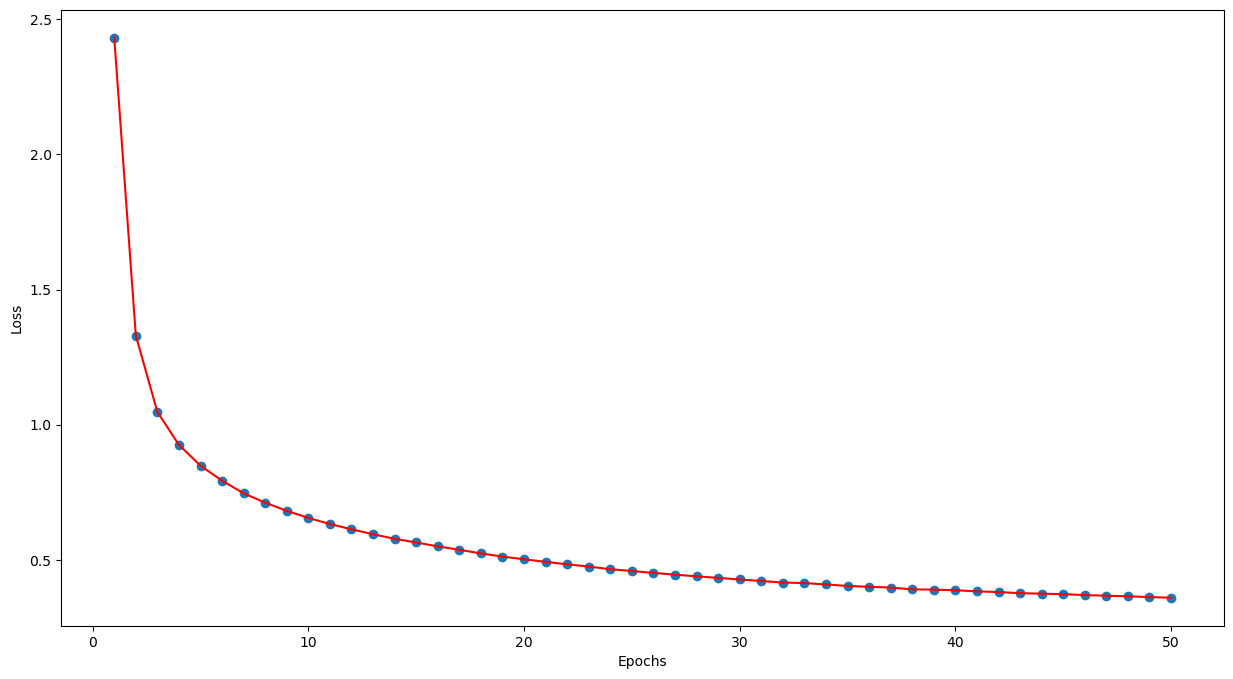

In [57]:
plt.figure(figsize=(15,8))
plt.scatter(range(1,51), Loss)
plt.plot(range(1,51), Loss, color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

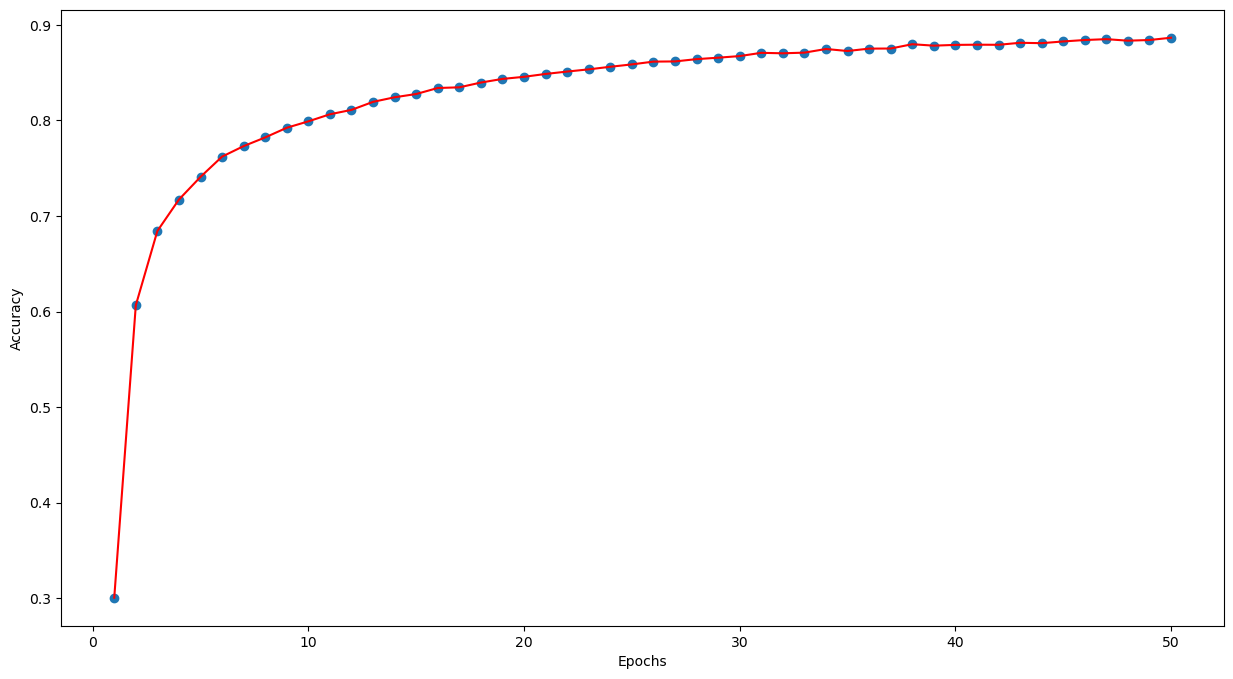

In [61]:
plt.figure(figsize=(15,8))
plt.scatter(range(1,51), accuracy)
plt.plot(range(1,51), accuracy, color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()